<a href="https://colab.research.google.com/github/Andreea-Belu/Diagnostic_Prediction_Age-related_Diseases/blob/main/Dataset_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

#Load the dataset

##Files and Field Descriptions

**train.csv - The training set.**
*   Id Unique identifier for each observation.
*   AB-GL 56 anonymized health characteristics. All are numeric except for EJ, which is categorical.
*   Class A binary target: 1 indicates the subject has been diagnosed with one of the three conditions, 0 indicates they have not.

**test.csv - The test set.**

My goal was to predict the probability that a subject in this set belongs to each of the two classes.
   
**greeks.csv - Supplemental metadata, only available for the training set.**
*   Alpha Identifies the type of age-related condition, if present.
    - A No age-related condition. Corresponds to class 0.
    - B, D, G The three age-related conditions. Correspond to class 1.
*   Beta, Gamma, Delta Three experimental characteristics.
*   Epsilon The date the data for this subject was collected. Note that all of the data in the test set was collected after the training set was collected.
   
**sample_submission.csv**- A sample submission file in the correct format.

In [ ]:
path = '/content/train.csv'
train = pd.read_csv(path)

path1 = '/content/test.csv'
test = pd.read_csv(path1)

path2 = '/content/greeks.csv'
greeks = pd.read_csv(path2)

path3 = '/content/sample_submission.csv'
greeks = pd.read_csv(path3)

In [ ]:
train

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [ ]:
print("Full train dataset shape is {}".format(train.shape))

Full train dataset shape is (617, 58)


The data is composed of 58 columns and 617 entries.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

There are 56 anonymized health characteristics. All are numeric except for EJ, which is categorical. There are also some health characteristics that have less than 617 values.

##Visualize the only column with categorical values (EJ).

In [ ]:
train['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

Population is segmented by EJ

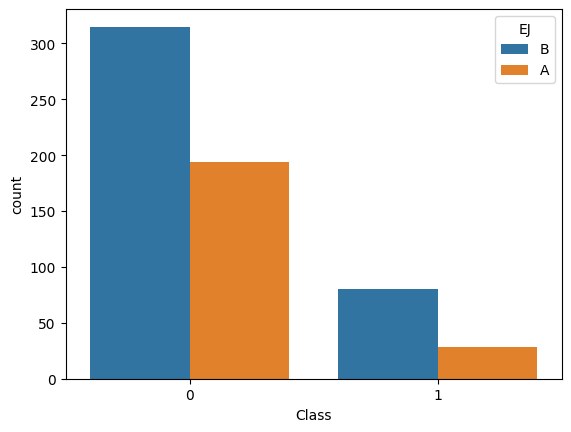

In [ ]:
sns.countplot ( x = "Class", hue="EJ", data = train)
pyplot.show();

When EJ == A, some columns are constant. EJ represents 36% of population. My guess, the competition organizers had 2 sites, or 2 trials or something similar.

##Missing Values visualization


There are some columns that contain missing values. They will be dealt with during preprocessing because during machine learning models do not suport missing values.

In [ ]:
nan_count_df = pd.DataFrame(train.isnull().sum()[1:] , columns=['nan_count'])
nan_count_df[nan_count_df['nan_count']!=0]

,nan_count
BQ,60
CB,2
CC,3
DU,1
EL,60
FC,1
FL,1
FS,2
GL,1


There are 9 columns which include missing values.

In [ ]:
def plot_nan_counts(df):
    # Count the number of NaN values in each column of the DataFrame.
    nan_counts = df.isnull().sum()
    # Filter out columns with zero NaN values (no need to plot them).
    nan_counts = nan_counts[nan_counts > 0]
    # Set up the plot figure with the specified size.
    plt.figure(figsize=(10, 5))
    # Create a bar plot to visualize the NaN counts per column.
    sns.barplot(x=nan_counts.index, y=nan_counts)
     # Set the label for the y-axis.
    plt.ylabel('Number of NaN values')
    # Rotate the x-axis labels for better readability.
    plt.xticks(rotation=45)
    # Display the plot.
    plt.show()

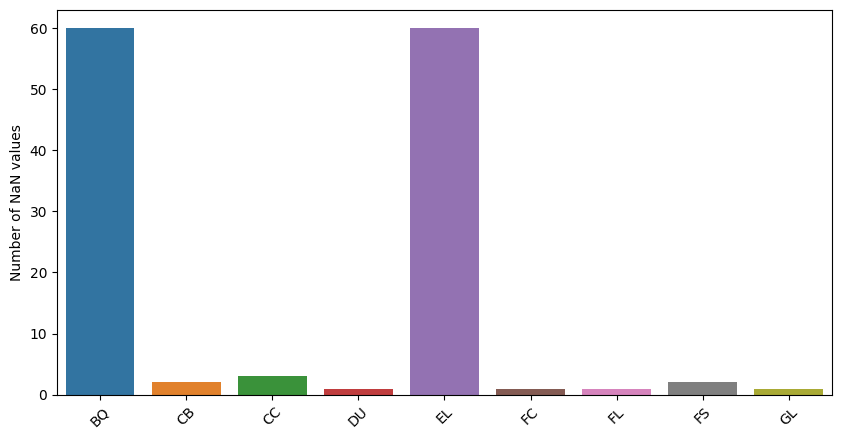

In [ ]:
#Apply the function for the training set.
plot_nan_counts(train)

Bar chart to visualize the columns with NaN (missing) values.


##Target visualization



Class is the label column indicating if a person has one or more of any of the three medical conditions (i.e,Class 1), or none of the three medical conditions (i.e,Class 0). Given the features of the dataset, the goal of our model is to predict the value of Class for any person.


Text(0.5, 1.0, 'Distribution of Target Label (i.e. Class)')

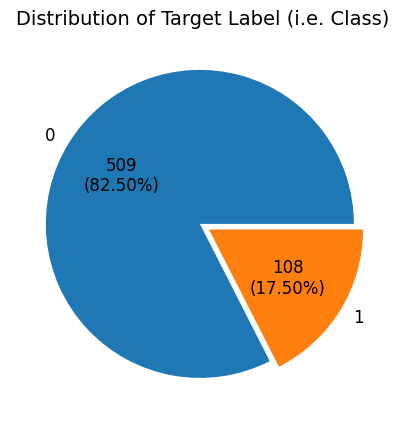

In [ ]:
# Set the figure size for the pie chart
plt.figure(figsize=(5,5))

# Define a function to format the percentage and count values for the pie chart labels
def auto_fmt (pct_value):
    # Calculate the count based on the percentage and total count of the 'Class' column in the 'train' DataFrame
    return '{:.0f}\n({:.2f}%)'.format(train['Class'].value_counts().sum()*pct_value/100,pct_value)

# Count the occurrences of each unique value in the 'Class' column and store it in a DataFrame
df_transported_count = train['Class'].value_counts().rename_axis('Class').reset_index(name='Counts')

fig = plt.gcf();
plt.pie(x=df_transported_count['Counts'], labels=df_transported_count['Class'], autopct=auto_fmt, textprops={'fontsize': 12}, explode=[.02,.05])
plt.title('Distribution of Target Label (i.e. Class)',  fontsize = 14)

Data is imbalanced due to a difference in the quantity of 0s and 1s.

##Visualize the correlation between Class and columns using hue feature in a boxplot & Checking for outliers

In [ ]:
#Visualizes either countplots (for categorical features) or boxplots (for numerical features) for each column in the DataFrame.
def visualize_box(df, hue='Class', grid_size=(8, 8)):
    columns = df.columns
    n_cols = len(columns)

    # Create a figure and axes for the subplots with the specified grid size and size of the overall figure
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(30, 40))
    fig.tight_layout(pad=3.0)

    # Iterate over each column and plot either a countplot (for categorical features) or a boxplot (for numerical features)
    for i, column in enumerate(columns):
        # Calculate the row and column index for the current subplot
        row, col = i // grid_size[1], i % grid_size[1]
        # Get the current axis for the subplot
        ax = axes[row, col]

        # Check if the column's dtype is 'object' (categorical feature)
        if df[column].dtype == 'object':
            # Create a countplot for the column using the specified hue for color grouping
            sns.countplot(data=df, x=column, hue=hue, ax=ax)
            ax.set_title(f'Countplot for {column}')
        else:
            # Create a boxplot for the column, using hue for color grouping
            sns.boxplot(data=df, x=hue, y=column, ax=ax)
            ax.set_title(f'Boxplot for {column}')
    # Remove any unused subplots beyond the number of columns in the DataFrame
    for i in range(n_cols, grid_size[0] * grid_size[1]):
        row, col = i // grid_size[1], i % grid_size[1]
        fig.delaxes(axes[row, col])

    plt.show()

In [ ]:
# Create a new DataFrame 'df_num' by dropping the columns 'Id' and 'EJ' from the DataFrame 'train'
df_num = train.drop(['Id', 'EJ'], axis = 1)

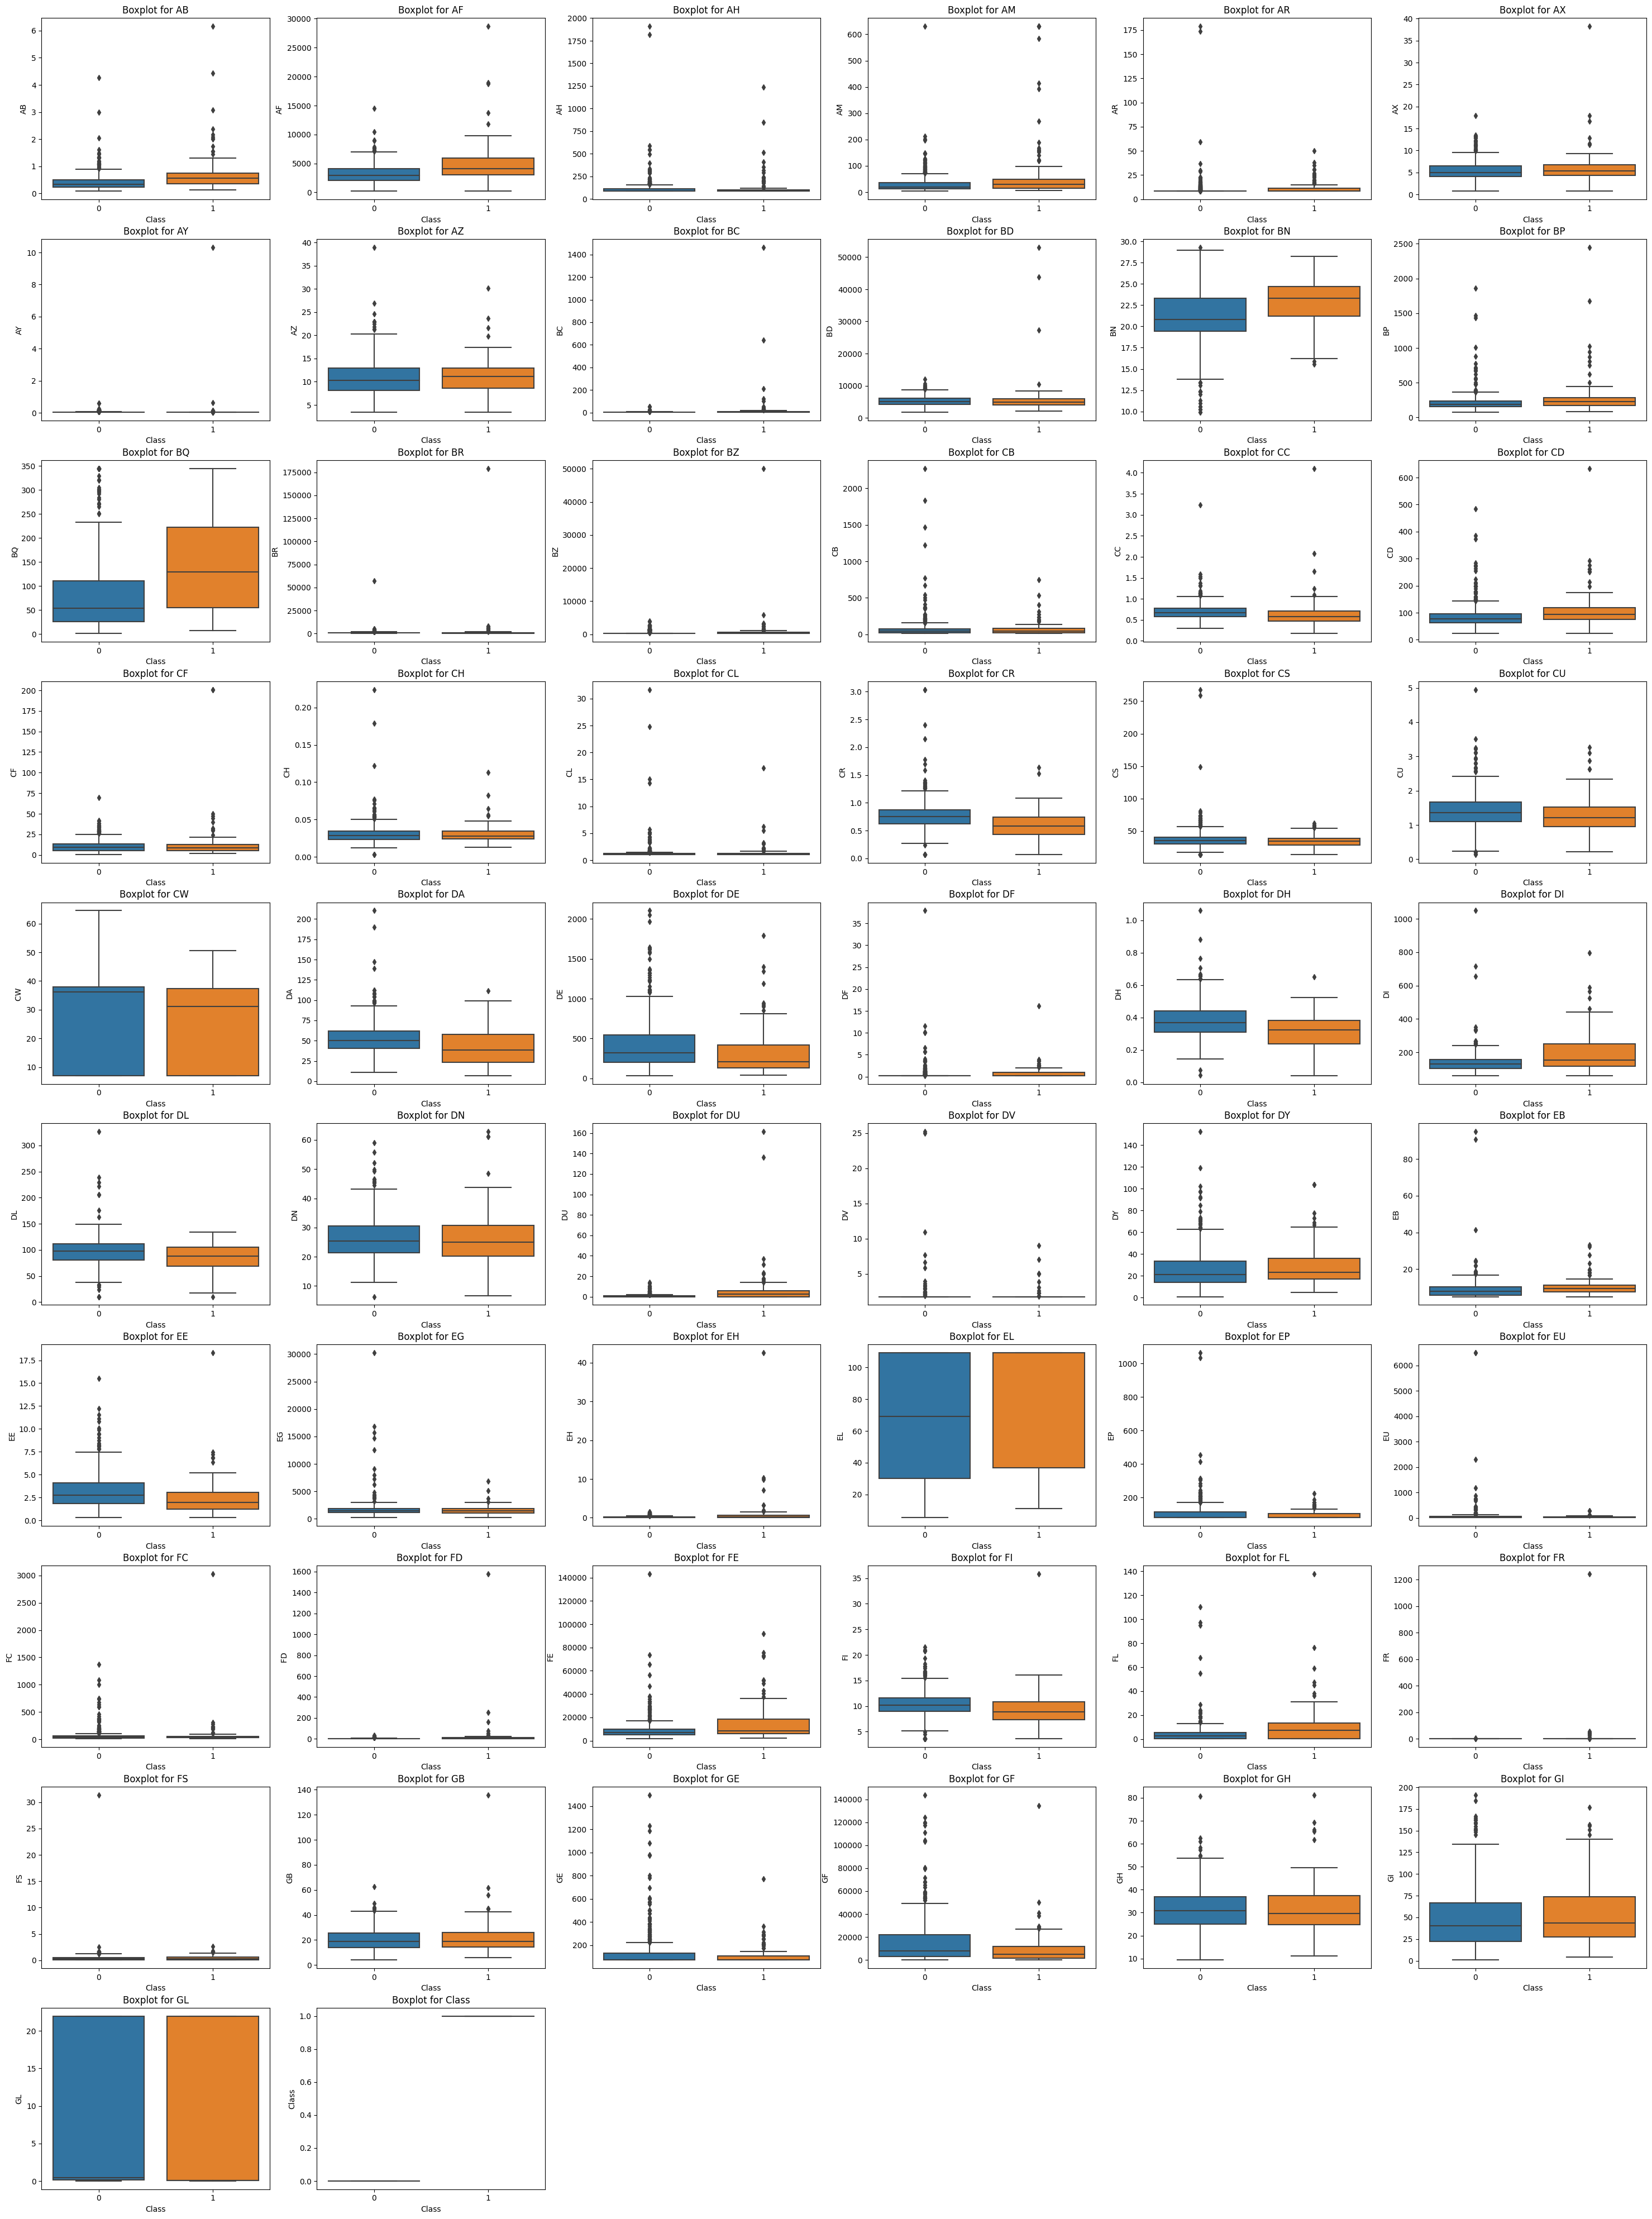

In [ ]:
visualize_box(df_num, hue='Class', grid_size=(10, 6))

##Visualize the correlation between Class and columns using hue feature in a histplot


In [ ]:
columns = train.columns.drop(['Id','Class', "EJ"])

ValueError: ignored

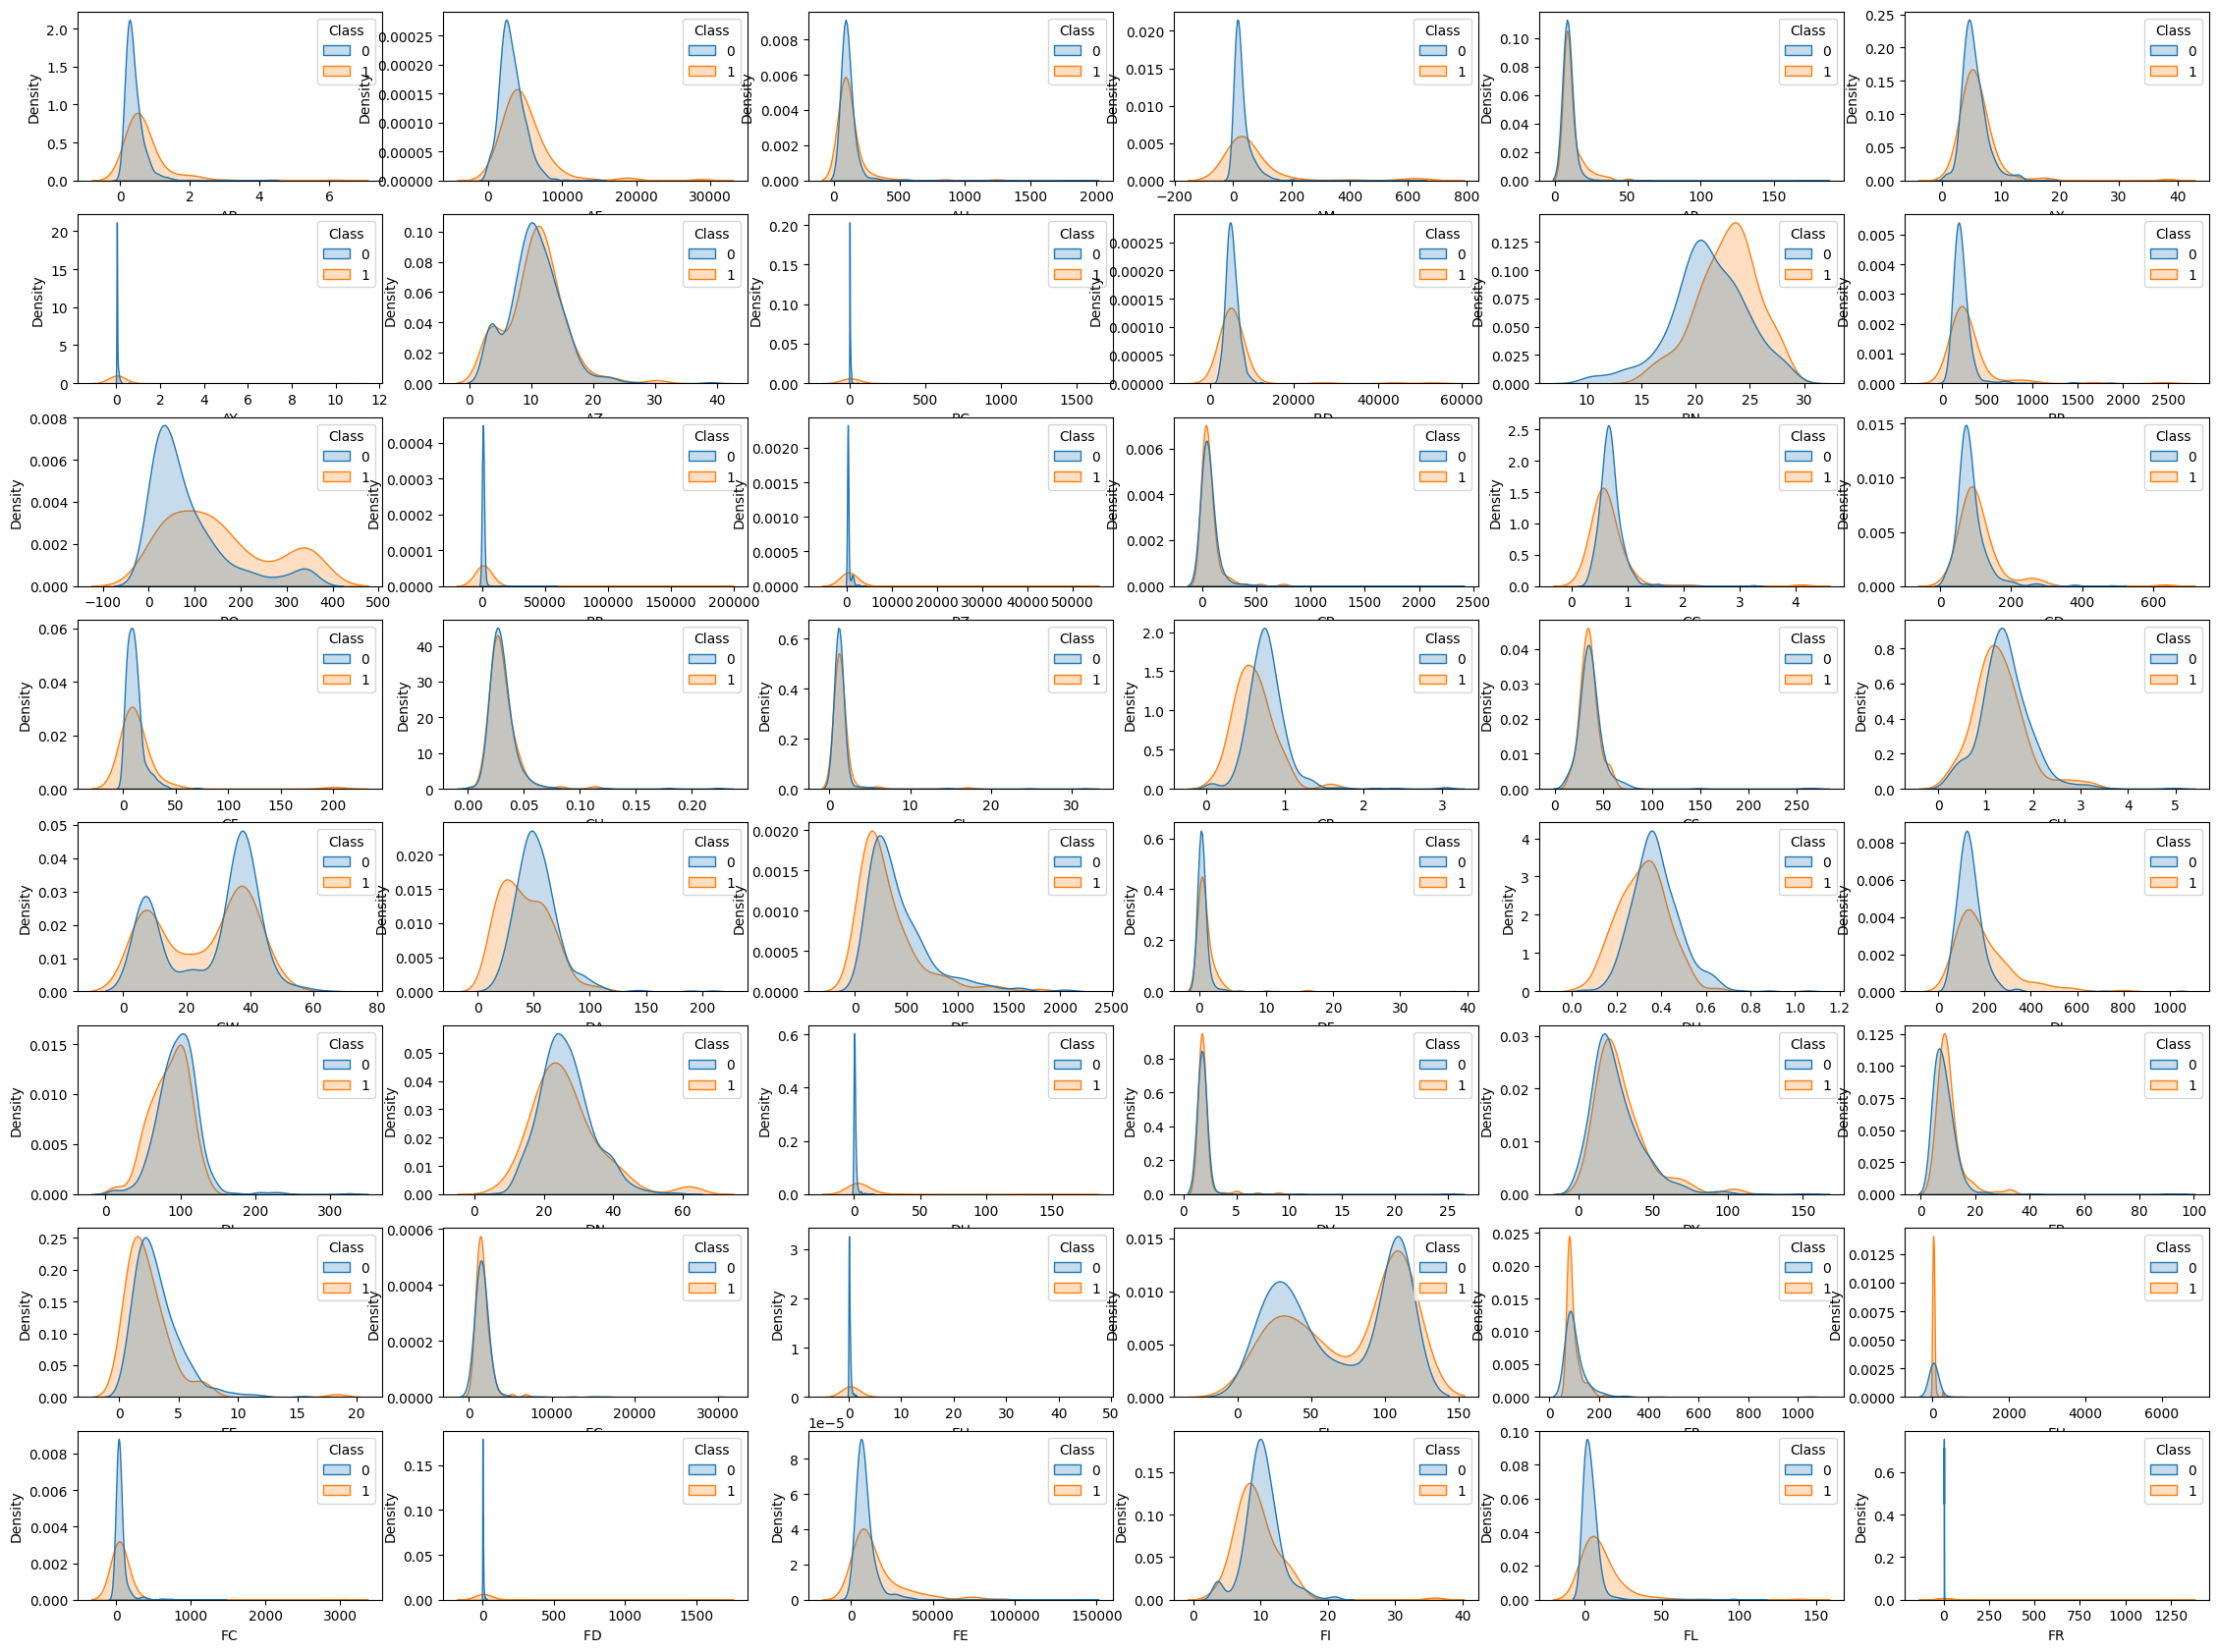

In [ ]:
rows = 8
cols = len(columns)//rows

plt.figure(figsize=(3.5*rows,3.5*cols))
for i, column in enumerate(columns):
    plt.subplot(rows, cols, i+1)
    sns.kdeplot(data = train, x = column, hue="Class", fill=True, common_norm=False)
    plt.xlabel(column)

<ipython-input-30-d2a22973c174>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=False,cmap='coolwarm')


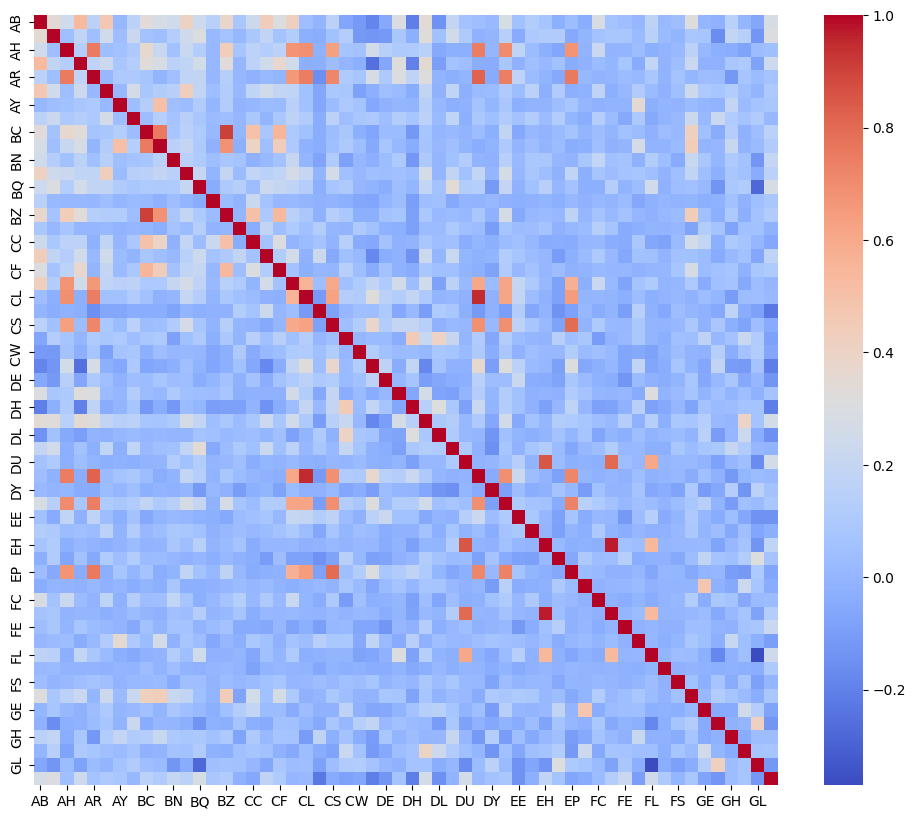

In [ ]:
#Correlation map of the health characteristics

plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),annot=False,cmap='coolwarm')
plt.show();